<a href="https://colab.research.google.com/github/maasadi20000/New/blob/main/Yet_another_copy_of_Copy_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, models, layers,optimizers,losses,utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(trn_img,trn_lbl),(tst_img,tst_lbl)=datasets.mnist.load_data()
x_train=trn_img.reshape(60000,28,28,1)
x_test=tst_img.reshape(10000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=utils.to_categorical(trn_lbl)
y_test=utils.to_categorical(tst_lbl)

11490434/11490434 [==============================] - 0s 0us/step


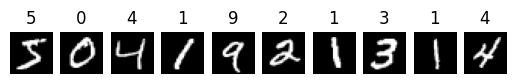

In [ ]:

k=10
for i in range(k):
   plt.subplot(1,k,i+1)
   plt.imshow(trn_img[i],cmap='gray')
   plt.title(trn_lbl[i])
   plt.axis('off')

In [ ]:
myInput=layers.Input(shape=(28,28,1))
conv1=layers.Conv2D(16,3, activation='relu',padding='same',strides=2)(myInput)
conv2=layers.Conv2D(16,3, activation='relu',padding='same',strides=2)(conv1)
flat=layers.Flatten()(conv2)
outlayer=layers.Dense(10, activation='softmax')(flat)
myModel=models.Model(myInput,outlayer)
myModel.compile(optimizer=optimizers.legacy.SGD(lr=0.001),loss=losses.categorical_crossentropy)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
myModel.fit(x_train,y_train,batch_size=128,epochs=200, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 8s 21ms/step - loss: 0.2516 - val_loss: 0.2402
Epoch 2/200
220/375 [================>.............] - ETA: 3s - loss: 0.2513